# Install Detectron2

**Please make sure you have pytorch with CUDA support if you run this outside colab environtment**

In [ ]:
# install pyyaml==5.1 to prevent dependency issue
!python -m pip install pyyaml==5.1
!pip install -U gdown
# install detectron2
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

**Check installation**

In [3]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118
detectron2: 0.6


# Load Model and Perform Counting

**Import libraries**

In [4]:
import os, json, cv2, random
from google.colab.patches import cv2_imshow

from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

**Create functions to count and visualize**

In [5]:
def count_output(outputs):
  print(len(outputs["instances"].pred_boxes.to('cpu')))

In [6]:
def show_image_output(image, outputs):
  class_labels = outputs["instances"].pred_classes.cpu()
  boxes = outputs["instances"].pred_boxes.to('cpu')
  print(len(outputs["instances"].pred_classes))

  img = image.copy()
  for box in boxes:
    center_x = box[0] + (box[2] - box[0]) / 2
    center_y = box[1] + (box[3] - box[1]) / 2
    cv2.circle(img, (int(center_x), int(center_y)), 10, (255, 255, 255), -1)
  cv2_imshow(img)

**Download the data**

In [7]:
!gdown https://drive.google.com/uc?id=1tYTusIvB0QQn2ZlbcZLeTdym4gB5FD5k
!gdown https://drive.google.com/uc?id=1n00pi5KItkbqgFDsY2gOVAjGpCphpqBi
!gdown https://drive.google.com/uc?id=1FH9u1d7D4EfPee5Ksla5kcdXeCnU4d9h

Downloading...
From: https://drive.google.com/uc?id=1tYTusIvB0QQn2ZlbcZLeTdym4gB5FD5k
To: /content/apples_TRAIN_3_fpn50.yaml
100% 5.83k/5.83k [00:00<00:00, 21.5MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1n00pi5KItkbqgFDsY2gOVAjGpCphpqBi
From (redirected): https://drive.google.com/uc?id=1n00pi5KItkbqgFDsY2gOVAjGpCphpqBi&confirm=t&uuid=57ec0cc3-65c4-46c5-898a-616d16a2d7ae
To: /content/model_final.pth
100% 351M/351M [00:09<00:00, 35.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FH9u1d7D4EfPee5Ksla5kcdXeCnU4d9h
To: /content/count.jpg
100% 176k/176k [00:00<00:00, 99.3MB/s]


**Load image**

In [8]:
im = cv2.imread('/content/count.jpg')

**Load trained model**

In [9]:
cfg = get_cfg()
cfg.merge_from_file("/content/apples_TRAIN_3_fpn50.yaml")
cfg.MODEL.WEIGHTS = "/content/model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7

predictor = DefaultPredictor(cfg)

**Predict**

In [10]:
outputs = predictor(im)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


**Count / show length of bounding box**

In [11]:
count_output(outputs)

37


# Visualization

**Show center point of apple**

37


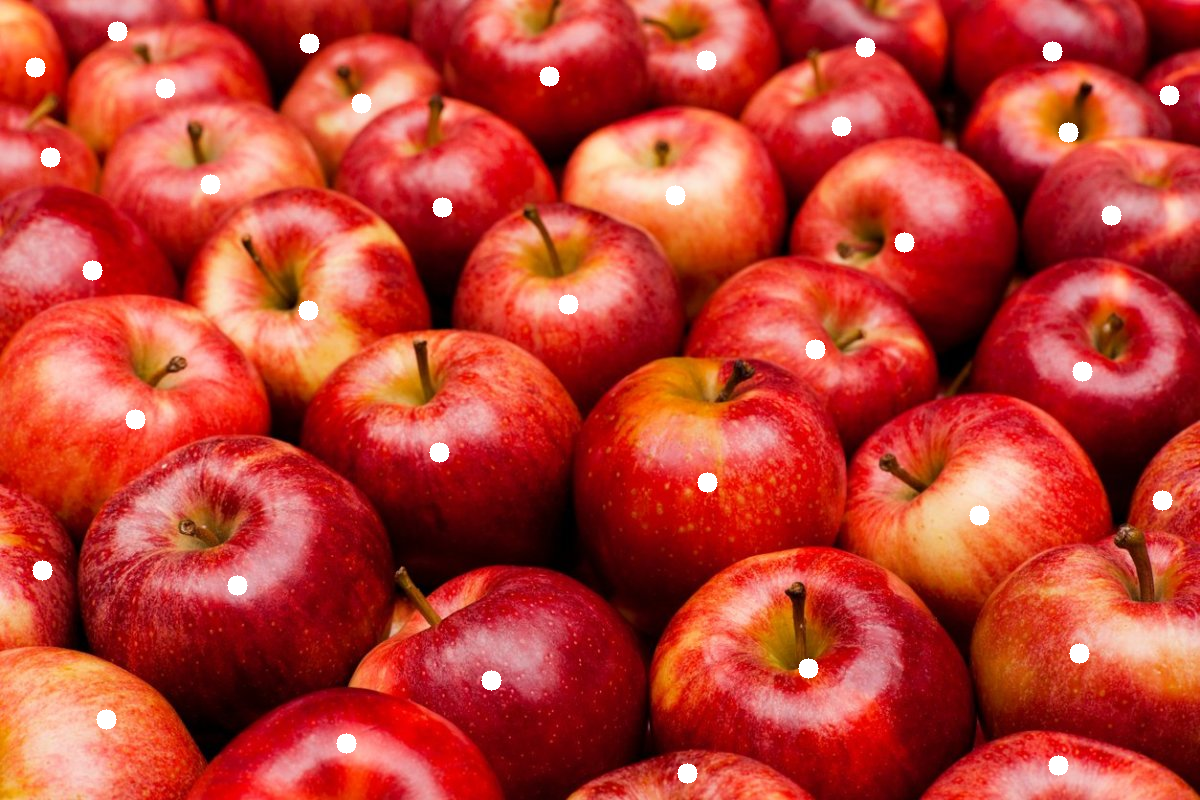

In [12]:
show_image_output(im, outputs)

**Show output masks**

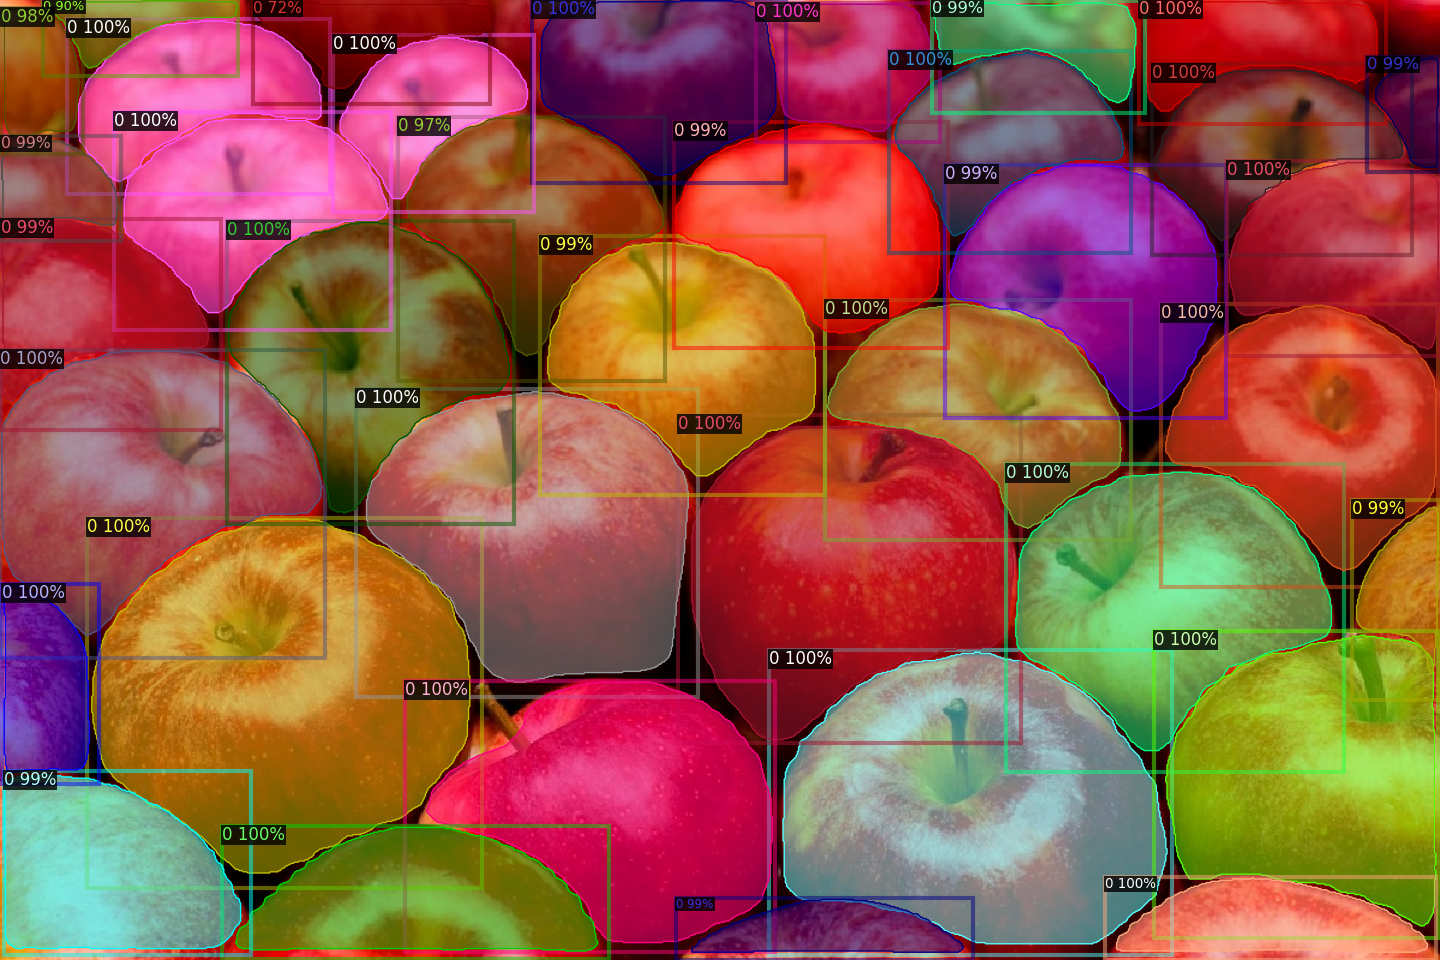

In [13]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])